# **EDA On Time Series Datasets**

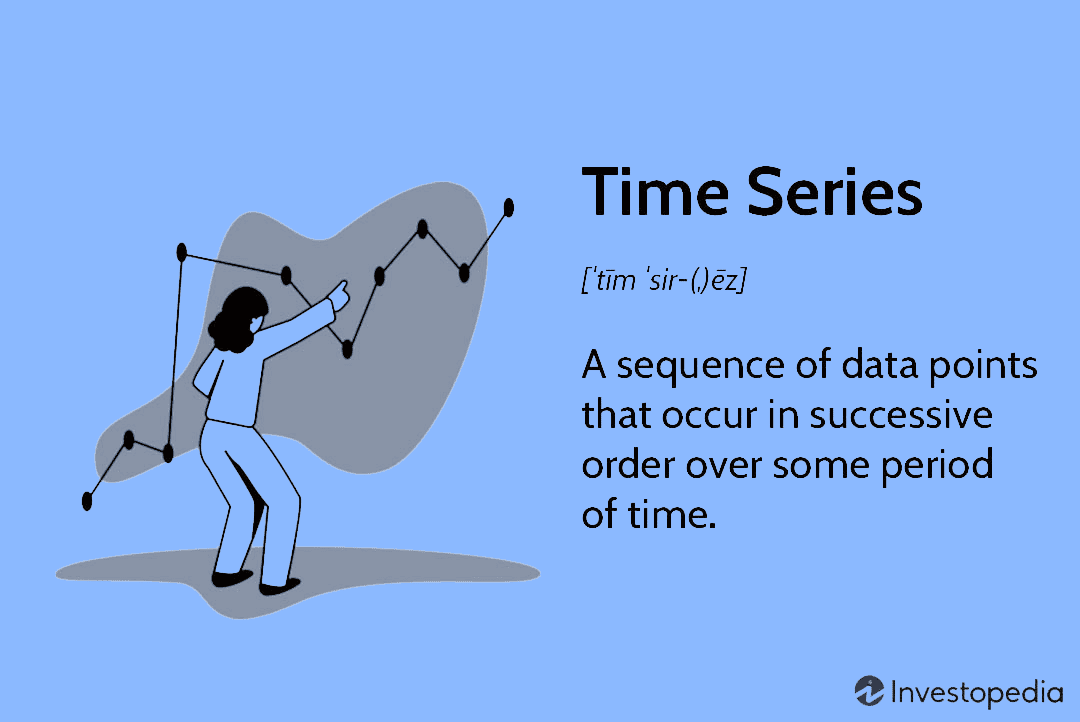

In [1]:
!pip install ucimlrepo

**Explanation**

Installs the `ucimlrepo` package to access datasets from the UCI Machine Learning Repository directly in Python.

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
air_quality = fetch_ucirepo(id=360)

# Convert features and targets to pandas DataFrame
data = pd.DataFrame(air_quality.data.features, columns=air_quality.features)

data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


**Explanation**

Fetches the Air Quality dataset (ID: 360) from the UCI Machine Learning Repository, converts it to a pandas DataFrame, and displays the first few rows.


## **Decomposistion Analysis:** https://medium.com/@roshmitadey/time-series-decomposition-62cbf31ab65e


In [3]:
print(data['Date'].unique())
print(len(data['Date'].unique()))

['3/10/2004' '3/11/2004' '3/12/2004' '3/13/2004' '3/14/2004' '3/15/2004'
 '3/16/2004' '3/17/2004' '3/18/2004' '3/19/2004' '3/20/2004' '3/21/2004'
 '3/22/2004' '3/23/2004' '3/24/2004' '3/25/2004' '3/26/2004' '3/27/2004'
 '3/28/2004' '3/29/2004' '3/30/2004' '3/31/2004' '4/1/2004' '4/2/2004'
 '4/3/2004' '4/4/2004' '4/5/2004' '4/6/2004' '4/7/2004' '4/8/2004'
 '4/9/2004' '4/10/2004' '4/11/2004' '4/12/2004' '4/13/2004' '4/14/2004'
 '4/15/2004' '4/16/2004' '4/17/2004' '4/18/2004' '4/19/2004' '4/20/2004'
 '4/21/2004' '4/22/2004' '4/23/2004' '4/24/2004' '4/25/2004' '4/26/2004'
 '4/27/2004' '4/28/2004' '4/29/2004' '4/30/2004' '5/1/2004' '5/2/2004'
 '5/3/2004' '5/4/2004' '5/5/2004' '5/6/2004' '5/7/2004' '5/8/2004'
 '5/9/2004' '5/10/2004' '5/11/2004' '5/12/2004' '5/13/2004' '5/14/2004'
 '5/15/2004' '5/16/2004' '5/17/2004' '5/18/2004' '5/19/2004' '5/20/2004'
 '5/21/2004' '5/22/2004' '5/23/2004' '5/24/2004' '5/25/2004' '5/26/2004'
 '5/27/2004' '5/28/2004' '5/29/2004' '5/30/2004' '5/31/2004' '6/1/200

**Explanation**

Prints the unique dates from the `Date` column of the dataset and the total number of unique dates.


In [4]:
# Count the number for each date
number_of_hours_recorded_for_each_day = []
for date in data['Date'].unique():
    count = len(data[data['Date'] == date])
    number_of_hours_recorded_for_each_day.append(count)

print(f"The different number of hours recorded for each day is: {set(number_of_hours_recorded_for_each_day)}")

The different number of hours recorded for each day is: {24, 6, 15}


**Explanation**

Counts the number of hourly recordings for each unique date in the dataset and prints the distinct counts of hours recorded per day.


<ipython-input-5-fe9cda60efdb>:22: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')



Analyzing Daily seasonality...


<Figure size 1500x1200 with 0 Axes>

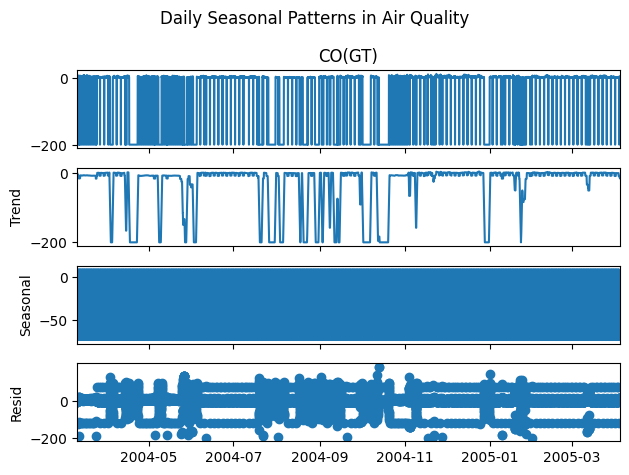


Analyzing Weekly seasonality...


<Figure size 1500x1200 with 0 Axes>

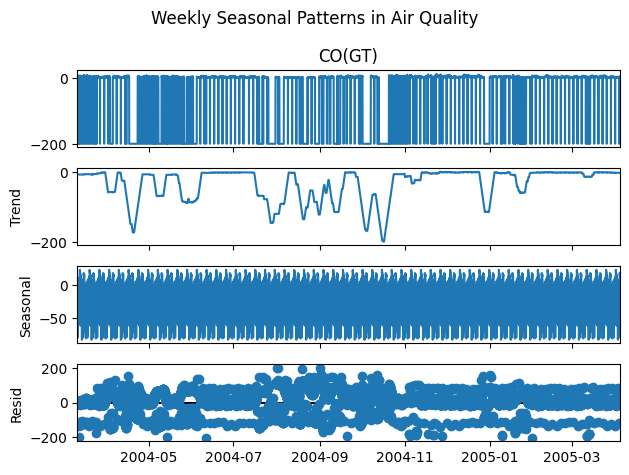


Analyzing Monthly seasonality...


<Figure size 1500x1200 with 0 Axes>

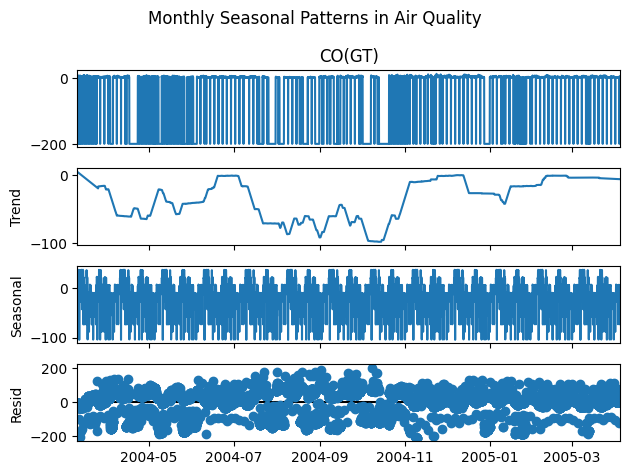

In [5]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

def prepare_hourly_air_quality_data(df):
    """
    Prepares hourly air quality data for seasonal decomposition.

    Parameters:
    df: DataFrame with separate 'Date' and 'Time' columns
    """
    # Combine Date and Time columns into a single datetime index
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

    # Set the datetime as index
    df = df.set_index('datetime')

    # Sort index to ensure chronological order
    df = df.sort_index()

    # Resample to hourly frequency and interpolate any gaps
    df = df.asfreq('h')
    df = df.interpolate(method='linear')

    return df

def analyze_multiple_seasonality(df, column_name):
    """
    Analyzes air quality data at different seasonal frequencies.

    Parameters:
    df: DataFrame with hourly air quality measurements
    column_name: name of the column containing measurements
    """
    # Define different seasonal periods
    periods = {
        'Daily': 24,          # 24 hours in a day
        'Weekly': 24 * 7,     # 168 hours in a week
        'Monthly': 24 * 30,   # ~720 hours in a month
    }

    # Create subplots for each decomposition
    import matplotlib.pyplot as plt

    for period_name, period_hours in periods.items():
        print(f"\nAnalyzing {period_name} seasonality...")

        try:
            # Perform decomposition
            decomposition = seasonal_decompose(
                df[column_name],
                period=period_hours,
                extrapolate_trend='freq'
            )

            # Plot results
            plt.figure(figsize=(15, 12))
            decomposition.plot()
            plt.suptitle(f'{period_name} Seasonal Patterns in Air Quality')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Could not analyze {period_name} seasonality: {e}")

# Usage example:
df = prepare_hourly_air_quality_data(data)
analyze_multiple_seasonality(df, 'CO(GT)')

**Explanation**

This code processes hourly air quality data and analyzes its seasonal patterns at different frequencies (daily, weekly, and monthly) using seasonal decomposition. Here's a step-by-step explanation:



1. **Data Preparation: Prepare Hourly Air Quality Data (`prepare_hourly_air_quality_data`)**:  
   - Combines separate `Date` and `Time` columns into a single `datetime` column.  
   - Sets the `datetime` column as the index to create a time-series index.  
   - Ensures chronological order by sorting the index.  
   - Resamples the data to an hourly frequency (`asfreq('h')`) and fills gaps using linear interpolation.


2. **Seasonal Analysis: Analyze Multiple Seasonal Patterns (`analyze_multiple_seasonality`)**:  
   - Defines seasonal periods:
     - **Daily**: 24 hours.
     - **Weekly**: 168 hours (7 days).
     - **Monthly**: ~720 hours (30 days).  
   - Iterates over each period:
     - Performs seasonal decomposition using `seasonal_decompose` to break the time series into trend, seasonal, and residual components.
     - Plots the decomposition results, showing the observed data and its components.

3. **Error Handling**:  
   - If decomposition fails (e.g., insufficient data), an error message is displayed.

4. **Visualization**:  
   - Results are visualized with titles indicating the type of seasonality being analyzed.  

**Example Usage**

- **Prepare Data**: Call `prepare_hourly_air_quality_data` with raw air quality data containing `Date` and `Time` columns.  
- **Analyze Seasonality**: Call `analyze_multiple_seasonality` with the prepared dataset and the column name (e.g., `'CO(GT)'`).

**In Summary**

This code prepares hourly air quality data and analyzes its seasonal trends at different frequencies, helping identify periodic patterns for better understanding and forecasting.


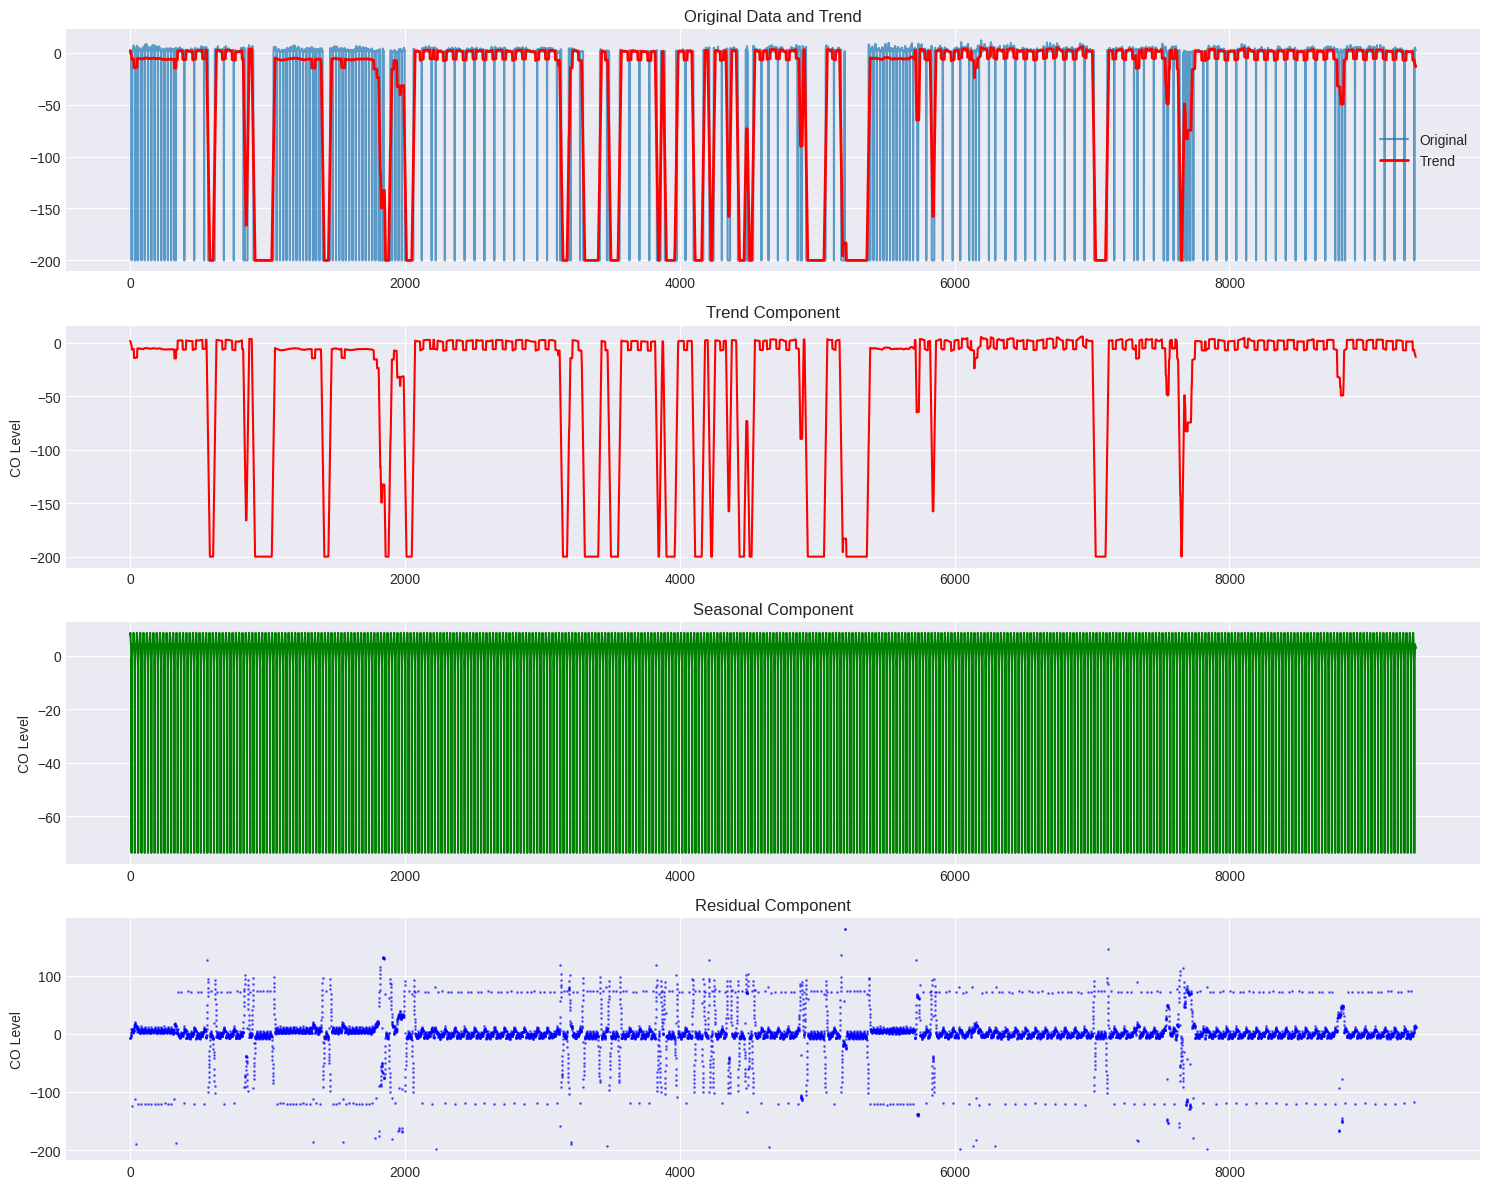


Component Statistics:

Trend Component:
Mean: -34.20
Std: 66.52
Min: -200.00
Max: 5.59

Seasonal Component:
Mean: -0.00
Std: 15.72
Min: -73.66
Max: 8.66

Residual Component:
Mean: -0.00
Std: 31.61
Min: -198.47
Max: 180.37


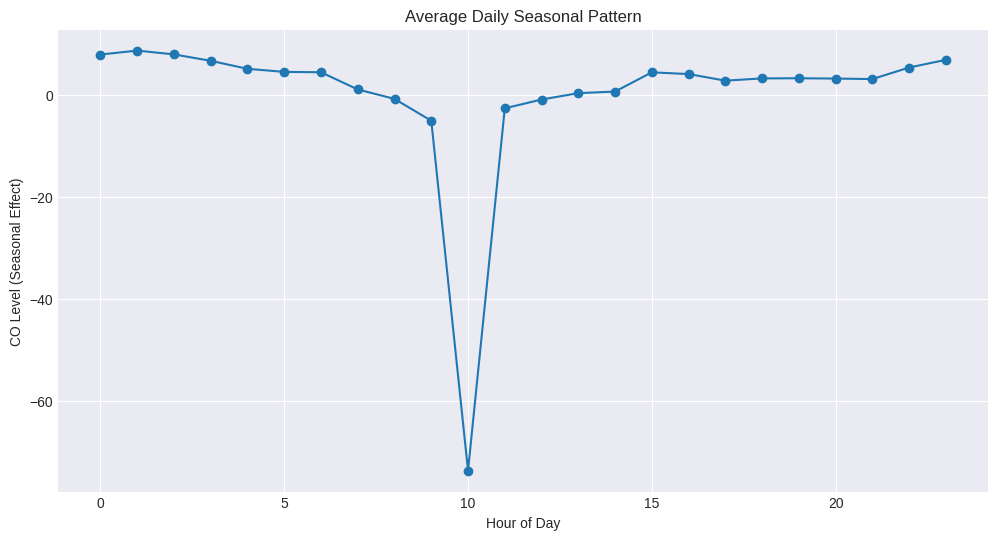


Peak CO level occurs at hour: 1
Lowest CO level occurs at hour: 10
Peak-to-trough difference: 82.32


In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def analyze_air_quality_decomposition(df, column_name='CO(GT)', period=24):
    """
    Performs additive decomposition on air quality data and creates detailed visualizations.

    Parameters:
    df: DataFrame with datetime index and air quality measurements
    column_name: Name of the column containing CO measurements
    period: Number of time steps in one seasonal cycle (24 for hourly data)
    """
    # Ensure the data is properly sorted by time
    df = df.sort_index()

    # Perform additive decomposition
    decomposition = seasonal_decompose(
        df[column_name],
        period=period,
        model='additive',
        extrapolate_trend='freq'
    )

    # Create a more detailed visualization
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))

    # Plot 1: Original Data with Trend
    axes[0].plot(df.index, df[column_name], label='Original', alpha=0.7)
    axes[0].plot(df.index, decomposition.trend, label='Trend', color='red', linewidth=2)
    axes[0].set_title('Original Data and Trend')
    axes[0].legend()

    # Plot 2: Trend Component
    axes[1].plot(df.index, decomposition.trend, color='red')
    axes[1].set_title('Trend Component')
    axes[1].set_ylabel('CO Level')

    # Plot 3: Seasonal Component
    axes[2].plot(df.index, decomposition.seasonal, color='green')
    axes[2].set_title('Seasonal Component')
    axes[2].set_ylabel('CO Level')

    # Plot 4: Residual Component
    axes[3].scatter(df.index, decomposition.resid, color='blue', alpha=0.5, s=1)
    axes[3].set_title('Residual Component')
    axes[3].set_ylabel('CO Level')

    plt.tight_layout()
    plt.show()

    # Calculate and display component statistics
    stats = {
        'Trend': {
            'Mean': decomposition.trend.mean(),
            'Std': decomposition.trend.std(),
            'Min': decomposition.trend.min(),
            'Max': decomposition.trend.max()
        },
        'Seasonal': {
            'Mean': decomposition.seasonal.mean(),
            'Std': decomposition.seasonal.std(),
            'Min': decomposition.seasonal.min(),
            'Max': decomposition.seasonal.max()
        },
        'Residual': {
            'Mean': decomposition.resid.mean(),
            'Std': decomposition.resid.std(),
            'Min': decomposition.resid.min(),
            'Max': decomposition.resid.max()
        }
    }

    # Print the statistics
    print("\nComponent Statistics:")
    for component, metrics in stats.items():
        print(f"\n{component} Component:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.2f}")

    return decomposition, stats

# Additional analysis for seasonal patterns
def analyze_seasonal_patterns(decomposition, period=24):
    """
    Analyzes the seasonal patterns in more detail.
    """
    # Get the unique seasonal pattern
    seasonal_pattern = pd.Series(decomposition.seasonal[:period])

    # Create hour labels (assuming hourly data)
    hours = range(period)

    # Plot the average daily pattern
    plt.figure(figsize=(12, 6))
    plt.plot(hours, seasonal_pattern, marker='o')
    plt.title('Average Daily Seasonal Pattern')
    plt.xlabel('Hour of Day')
    plt.ylabel('CO Level (Seasonal Effect)')
    plt.grid(True)
    plt.show()

    # Find peak and trough hours
    peak_hour = seasonal_pattern.idxmax()
    trough_hour = seasonal_pattern.idxmin()

    print(f"\nPeak CO level occurs at hour: {peak_hour}")
    print(f"Lowest CO level occurs at hour: {trough_hour}")
    print(f"Peak-to-trough difference: {seasonal_pattern.max() - seasonal_pattern.min():.2f}")


decomp, statistics = analyze_air_quality_decomposition(data)
analyze_seasonal_patterns(decomp)

**Explanation**

This code performs detailed seasonal decomposition on air quality data and provides visualizations and statistical summaries of the results. It also analyzes seasonal patterns in the data. Here's a step-by-step breakdown:

**Decomposition Analysis:**

1. **Data Preparation**:  
   - Ensures the data is sorted by time to avoid issues with time series operations.  

2. **Additive Decomposition**:  
   - Decomposes the time series (`CO(GT)` column) into **Trend**, **Seasonal**, and **Residual** components using the `seasonal_decompose` function.  
   - The period (`24`) corresponds to daily seasonality for hourly data.

3. **Visualizations**:  
   - Four subplots display:
     - **Original Data and Trend**: Shows the raw data alongside the trend component.  
     - **Trend Component**: Illustrates the smoothed trend over time.  
     - **Seasonal Component**: Highlights periodic fluctuations within each cycle.  
     - **Residual Component**: Displays the noise or irregular patterns in the data.  

4. **Component Statistics**:  
   - Calculates and prints descriptive statistics (mean, standard deviation, min, max) for each component.
   

**Seasonal Pattern Analysis:**

1. **Extract Seasonal Pattern**:  
   - Focuses on the seasonal component of the decomposition and isolates the repeating pattern for one cycle (e.g., 24 hours for daily seasonality).

2. **Visualization of Seasonal Effects**:  
   - Plots the average seasonal pattern over the period, showing how CO levels fluctuate throughout a typical day.

3. **Identify Key Patterns**:  
   - Identifies the hours with the **highest** (peak) and **lowest** (trough) seasonal effects.  
   - Calculates the peak-to-trough difference to quantify the range of fluctuation.

**Example Workflow**

1. **Decomposition Analysis**:  
   - Call `analyze_air_quality_decomposition(data)` to perform the decomposition and visualize the components.  

2. **Seasonal Pattern Analysis**:  
   - Call `analyze_seasonal_patterns(decomp)` to examine daily seasonal variations and key patterns in the seasonal component.

**Key Outputs**

- **Plots**:  
   - Decomposition plots of Original Data, Trend, Seasonal, and Residual components.  
   - Seasonal pattern plot highlighting typical fluctuations within a cycle.

- **Statistics**:  
   - Descriptive statistics for each decomposition component.  
   - Insights into peak, trough, and seasonal effect ranges.


In summary, this code provides an in-depth decomposition of air quality data, detailed visualizations of trends and seasonal effects, and quantitative analysis of seasonal patterns.


## **Stationarity**

In [7]:
from statsmodels.tsa.stattools import adfuller
# 1. Stationarity Check
print("Stationarity Analysis for CO Levels:")
result = adfuller(data['CO(GT)'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

Stationarity Analysis for CO Levels:
ADF Statistic: -9.552224712392979
p-value: 2.553762126201297e-16
Critical values:
	1%: -3.43105123289464
	5%: -2.861849900767839
	10%: -2.566934955096094


**Explanation**

Conducts a stationarity analysis for CO levels using the Augmented Dickey-Fuller (ADF) test, printing the ADF statistic, p-value, and critical values to evaluate if the time series is stationary.


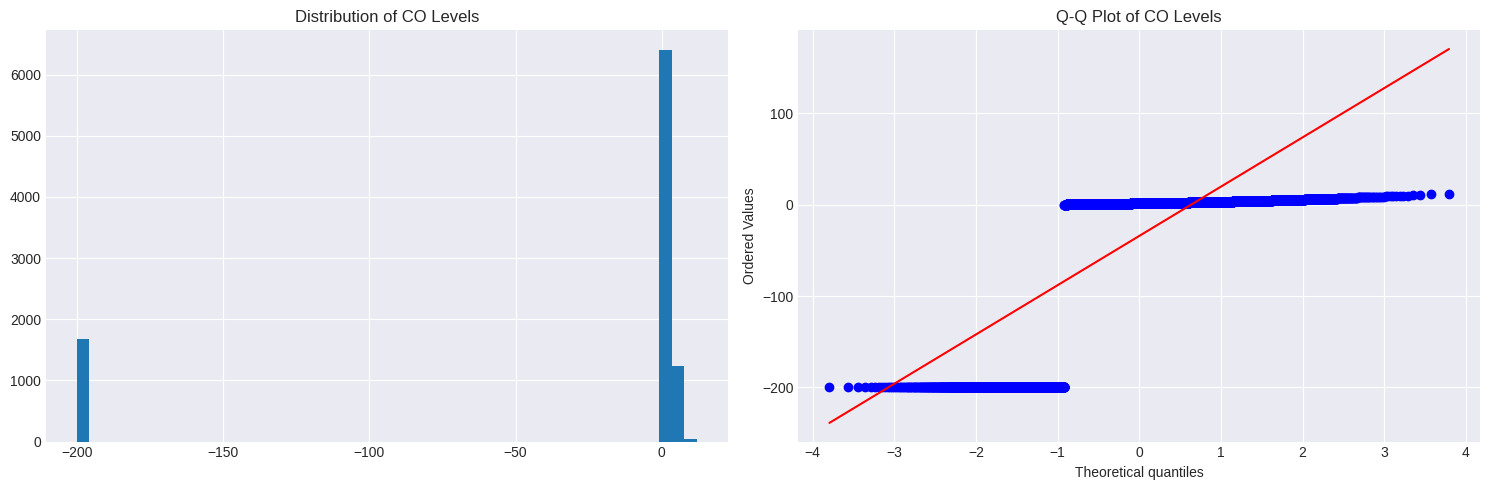

In [8]:
import scipy.stats as stats
# Distribution Analysis
plt.figure(figsize=(15, 5))
plt.subplot(121)
data['CO(GT)'].hist(bins=50)
plt.title('Distribution of CO Levels')

plt.subplot(122)
stats.probplot(data['CO(GT)'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of CO Levels')
plt.tight_layout()
plt.show()

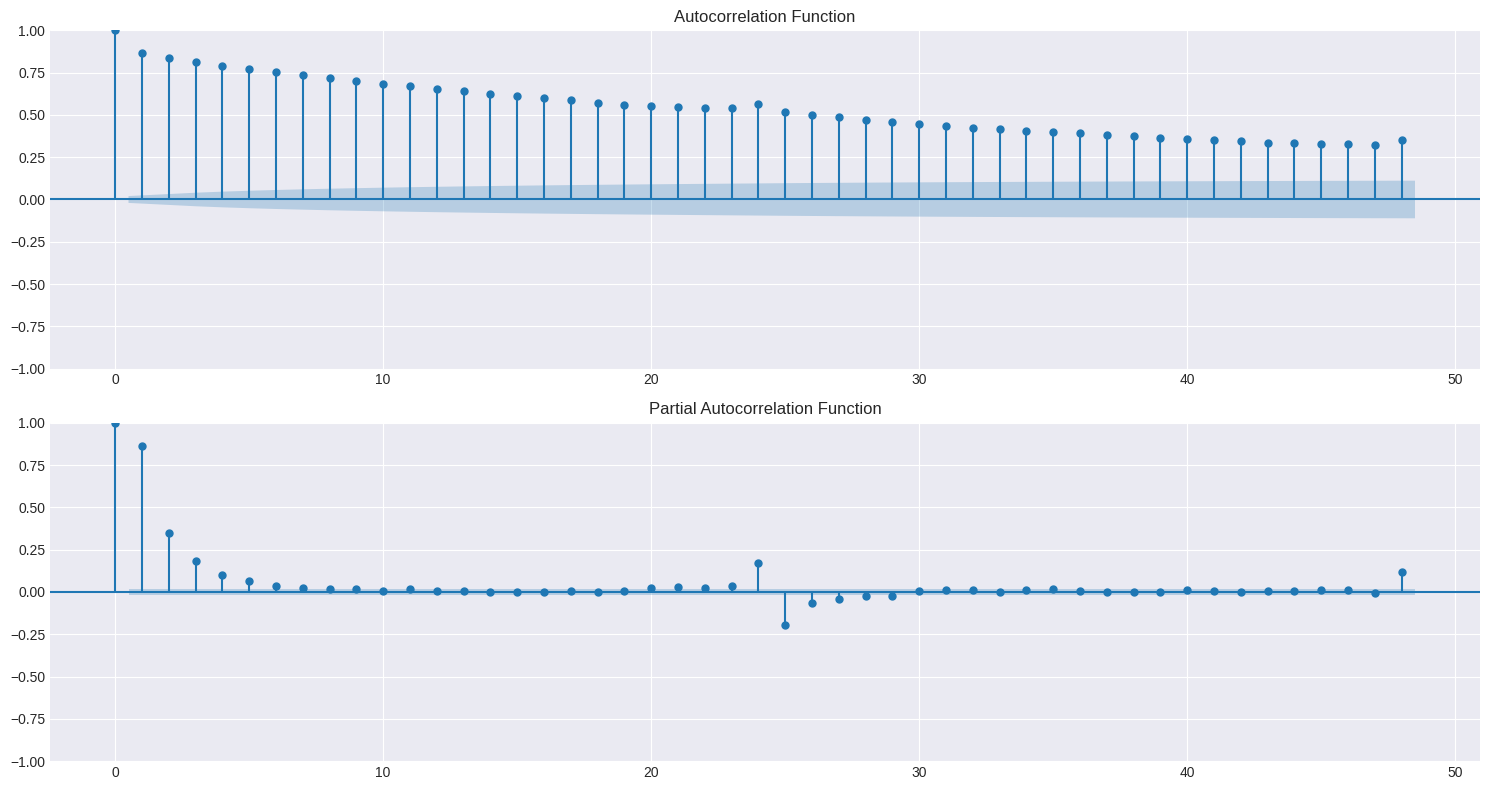

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 8))
plt.subplot(211)
plot_acf(data['CO(GT)'].dropna(), lags=48, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(212)
plot_pacf(data['CO(GT)'].dropna(), lags=48, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

**Explanation**

Visualizes the autocorrelation function (ACF) and partial autocorrelation function (PACF) for CO levels up to 48 lags to analyze dependencies and seasonal effects in the time series.


# 📚 **Take it a step further**:

1. **Time Series Decomposition**:
   - [Statsmodels Time Series Decomposition](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html): Official documentation for seasonal decomposition.
   - [Time Series Analysis in Python - Tutorial](https://www.machinelearningplus.com/time-series/time-series-analysis-python/): Comprehensive tutorial for time series decomposition and analysis.

2. **Stationarity Tests**:
   - [ADF Test - Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html): Official documentation for the Augmented Dickey-Fuller test.
   - [Guide to Stationarity Tests](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322): Explains stationarity concepts and tests with Python examples.

3. **Autocorrelation and PACF**:
   - [Autocorrelation and Partial Autocorrelation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html): Official Statsmodels documentation for ACF and PACF plots.
   - [Time Series Forecasting - ACF and PACF Explained](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/): Practical guide to understanding ACF and PACF for time series forecasting.

4. **Seasonality and Patterns**:
   - [Seasonal Decomposition of Time Series](https://towardsdatascience.com/seasonal-decomposition-of-time-series-in-python-2035cb18387d): Practical guide for understanding and analyzing seasonality in time series.
   - [How to Analyze Seasonality in Time Series Data](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/): Explains how to decompose and interpret seasonal patterns.

5. **Complete Time Series Analysis Notebooks**:
   - [Comprehensive Time Series Notebook](https://www.kaggle.com/code/prashant111/time-series-forecasting-arima-model/notebook): Kaggle notebook for time series analysis and modeling.
   - [Air Quality Dataset Analysis](https://www.kaggle.com/code/janiobachmann/air-quality-analysis): Notebook focused on air quality data exploration and time series insights.
